<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import modules</a></span></li><li><span><a href="#Import-audio-sample" data-toc-modified-id="Import-audio-sample-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import audio sample</a></span></li><li><span><a href="#Audio-Signal-Data" data-toc-modified-id="Audio-Signal-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Audio Signal Data</a></span></li><li><span><a href="#Spectrograms" data-toc-modified-id="Spectrograms-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Spectrograms</a></span></li><li><span><a href="#Mel-Scale" data-toc-modified-id="Mel-Scale-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Mel Scale</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Mel Spectrograms

</font>
</div>

# Import modules
<hr style = "border:2px solid black" ></hr>

In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

# Import audio sample
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

 - **Librosa** is one of the most popular and has an extensive set of features. 
 - **Scipy** is also commonly used. 
 - Pytorch has a companion library called **torchaudio** that is tightly integrated with Pytorch. It doesn’t have as much functionality as Librosa, but it is built specifically for deep learning.
    
</font>
</div>

In [3]:
# Load the audio file
AUDIO_FILE = './file_example_WAV_1MG.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

In [11]:
# Play the audio in the jupyter notebook
Audio(AUDIO_FILE)

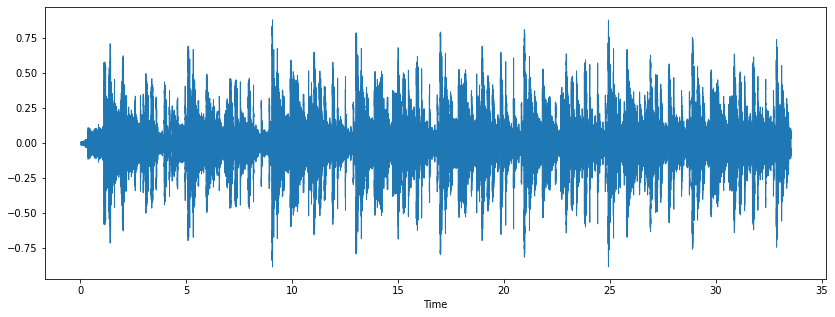

In [9]:
# x-axis has been converted to time using our sample rate. 
# matplotlib plt.plot(y), would output the same figure, but with sample 
# number on the x-axis instead of seconds
plt.figure(figsize=(14, 5))
librosa.display.waveshow(samples, sr=sample_rate)

# Audio Signal Data
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- As we saw in the previous article, audio data is obtained by sampling the sound wave at regular time intervals and measuring the intensity or amplitude of the wave at each sample. The metadata for that audio tells us the sampling rate which is the number of samples per second.

- When that audio is saved in a file it is in a compressed format. When the file is loaded, it is decompressed and converted into a Numpy array. This array looks the same no matter which file format you started with.

- In memory, audio is represented as a time series of numbers, representing the amplitude at each timestep. For instance, if the sample rate was 16800, a one-second clip of audio would have 16800 numbers. Since the measurements are taken at fixed intervals of time, the data contains only the amplitude numbers and not the time values. Given the sample rate, we can figure out at what time instant each amplitude number measurement was taken.

</font>
</div>

In [12]:
print ('Example shape ', samples.shape, 'Sample rate ', sample_rate, 'Data type', type(samples))
print (samples[22400:22420])

Example shape  (268237,) Sample rate  8000 Data type <class 'numpy.ndarray'>
[ 0.05712891  0.04534912  0.05734253  0.04953003  0.04490662  0.04179382
  0.04777527  0.04388428  0.02946472  0.05236816  0.04397583  0.03469849
  0.03578186  0.03131104  0.01766968  0.00311279  0.00308228 -0.00895691
 -0.00738525 -0.00733948]


<div class="alert alert-info">
<font color=black>

- The bit-depth tells us how many possible values those amplitude measurements for each sample can take. For example, a bit-depth of 16 means that the amplitude number can be between 0 and 65535 (2^16 — 1). 
    
- The bit-depth influences the resolution of the audio measurement — the higher the bit-depth, the better the audio fidelity.

</font>
</div>

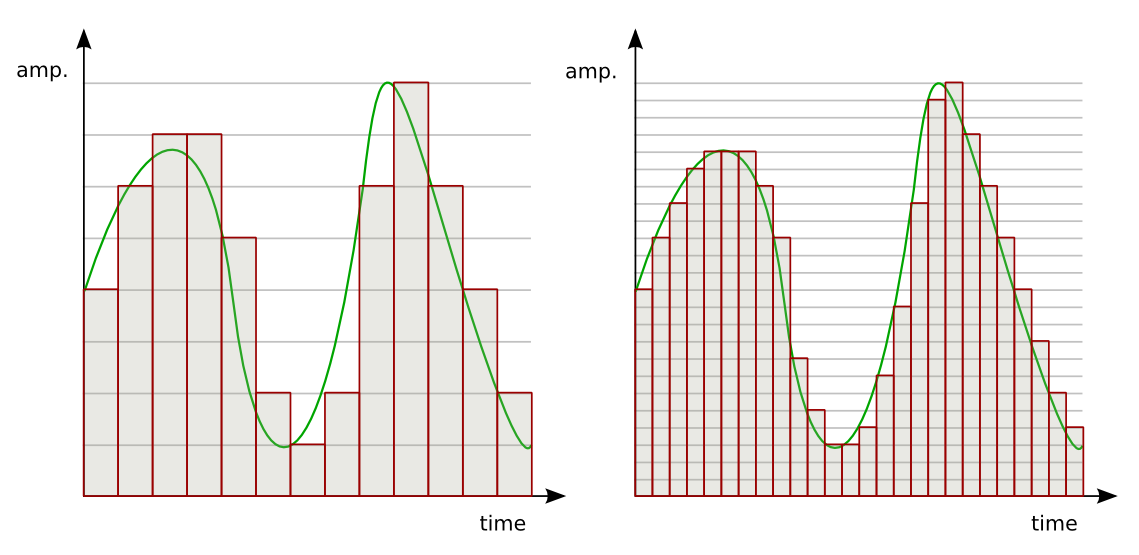

# Spectrograms
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- The common practice is to convert the audio into a spectrogram. The spectrogram is a concise ‘snapshot’ of an audio wave and since it is an **image**, it is well suited to being input to CNN-based architectures developed for handling images.
    
- **Spectrograms** are generated from sound signals using Fourier Transforms. A Fourier Transform decomposes the signal into its constituent frequencies and displays the amplitude of each frequency present in the signal.

- A Spectrogram chops up the duration of the sound signal into smaller time segments and then applies the Fourier Transform to each segment, to determine the frequencies contained in that segment. It then combines the Fourier Transforms for all those segments into a single plot.

- It plots Frequency (y-axis) vs Time (x-axis) and uses different colors to indicate the Amplitude of each frequency. The brighter the color the higher the energy of the signal.
    
</font>
</div>

/opt/anaconda3/envs/trainingAI/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


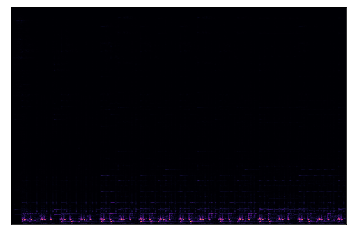

In [13]:
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

# Mel Scale
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- When looking at the spectrogram there isn’t much information for us to see. This happens because of the way humans perceive sound. Most of what we are able to hear are concentrated in a narrow range of frequencies and amplitudes.
- Humans do not perceive frequencies **linearly**. Humans are more sensitive to differences between lower frequencies than higher frequencies.
- The **Mel Scale** was developed to take this into account. It is a scale of pitches, such that each unit is judged by listeners to be equal in pitch distance from the next.

</font>
</div>

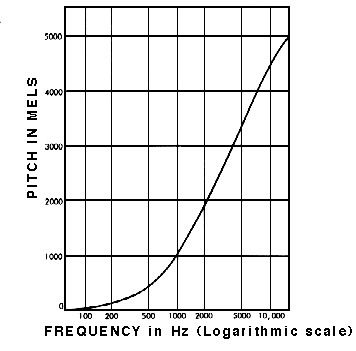

<div class="alert alert-info">
<font color=black>

- A Mel Spectrogram makes two important changes relative to a regular Spectrogram that plots Frequency vs Time.

    - It uses the Mel Scale instead of Frequency on the y-axis.
    - It uses the Decibel Scale instead of Amplitude to indicate colors.

- For deep learning models, we usually use this rather than a simple Spectrogram.

</font>
</div>

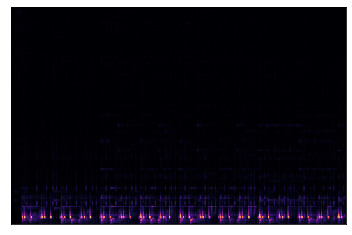

In [14]:
# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

<div class="alert alert-info">
<font color=black>

- This is better than before, but most of the spectrogram is still dark and not carrying enough useful information.
- So let’s modify it to use the Decibel Scale instead of Amplitude.

</font>
</div>

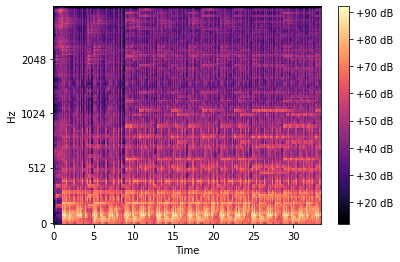

In [15]:
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate,
                         x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

# Conclusions
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-danger">
<font color=black>

- Although deep learning eliminates the need for hand-engineered features, we have to choose a representation model for our data. 
    
- Instead of directly using the sound file as an amplitude vs time signal we use a log-scaled mel-spectrogram with 128 components (bands) covering the audible frequency range (0-22050 Hz), using a window size of 23 ms (1024 samples at 44.1 kHz) and a hop size of the same duration. 

- This conversion takes into account the fact that human ear hears sound on log-scale, and closely scaled frequency are not well distinguished by the human cochlea. 

- The effect becomes stronger as frequency increases. 
    
</font>
</div>

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://towardsdatascience.com/audio-deep-learning-made-simple-part-2-why-mel-spectrograms-perform-better-aad889a93505
- https://stackoverflow.com/questions/43533023/librosa-display-waveplotnp-arrayf-sr-22050-attributeerror-module-obje
- [Download sample .wav file](https://file-examples.com/index.php/sample-audio-files/sample-wav-download/#google_vignette)
- [Building an Audio Classifier using Deep Neural Networks](https://www.kdnuggets.com/2017/12/audio-classifier-deep-neural-networks.html)

</font>
</div>    
